In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2 

# Directorio del dataset
dataset_dir = "C:\\Users\\Diego\\chest_xray"

# Directorios del dataset
train_dir = os.path.join(dataset_dir, "train")
val_dir = os.path.join(dataset_dir, "val")
test_dir = os.path.join(dataset_dir, "test")

# Configuración de parámetros
image_size = (224, 224)
batch_size = 32

# Data augmentation y generación de imágenes
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [2]:
#VGG16
from tensorflow.keras.applications import VGG16
# Cargar el modelo VGG16 preentrenado sin la capa superior
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Añadir capas adicionales
x = Flatten()(base_model.output)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=x)



optimizer = Adam(learning_rate=0.001)
# Compilar el modelo
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Entrenar el modelo
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=10,
                    verbose=1)

# Guardar el modelo
model.save('chest_xray_vgg16.h5')

# Evaluar el modelo
loss, accuracy = model.evaluate(test_generator)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 6,423,041 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10


C:\Users\Diego\anaconda3\envs\PUCP\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 429s 3s/step - accuracy: 0.7938 - loss: 2.3233 - val_accuracy: 0.6875 - val_loss: 0.7849
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 421s 3s/step - accuracy: 0.8907 - loss: 0.4145 - val_accuracy: 0.8125 - val_loss: 0.4647
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 421s 3s/step - accuracy: 0.8807 - loss: 0.3796 - val_accuracy: 0.7500 - val_loss: 0.5395
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 414s 3s/step - accuracy: 0.8569 - loss: 0.3822 - val_accuracy: 0.8125 - val_loss: 0.4109
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 414s 3s/step - accuracy: 0.8660 - loss: 0.3619 - val_accuracy: 0.6875 - val_loss: 0.7740
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 414s 3s/step - accuracy: 0.8515 - loss: 0.3721 - val_accuracy: 0.6875 - val_loss: 0.6967
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 414s 3s/step - accuracy: 0.8306 - loss: 0.3923 - val_accuracy: 0.6875 - val_loss: 0.7281
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 414s 3s/step - accuracy: 0.8096 - loss: 0.4158 - val_accuracy: 0.750

20/20 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.7938 - loss: 0.6948
Loss: 0.4600, Accuracy: 0.8622


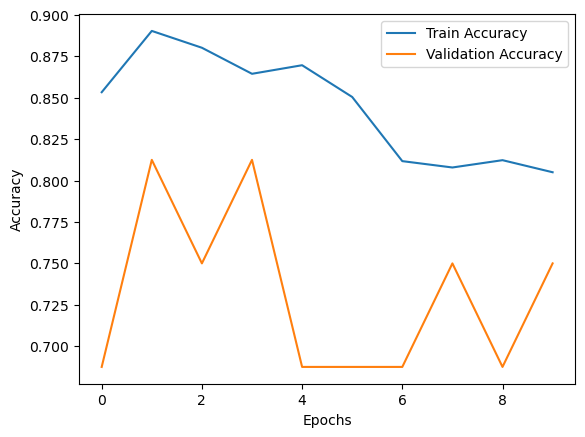

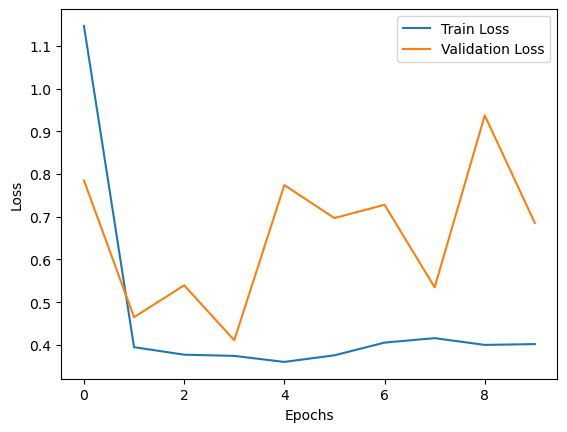

In [3]:
# Graficar resultados
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

20/20 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step


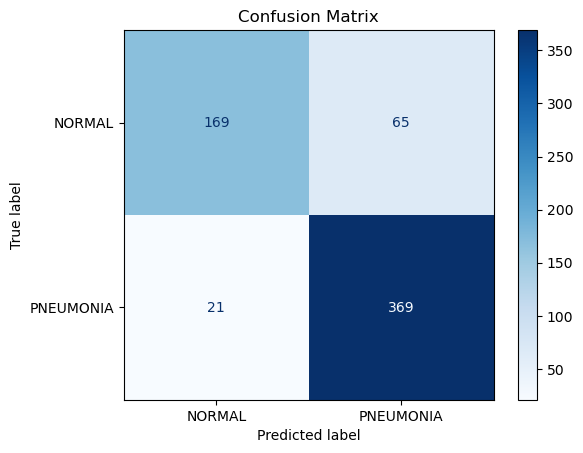

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(test_generator)
y_pred_binary = (y_pred > 0.5).astype(int)
cm = confusion_matrix(test_generator.classes, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [12]:
#RESNET
from tensorflow.keras.applications import ResNet50

# Cargar el modelo ResNet50 preentrenado sin la capa superior
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas del modelo base
for layer in base_model_resnet.layers:
    layer.trainable = False

# Añadir capas adicionales
x_resnet = Flatten()(base_model_resnet.output)
x_resnet = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x_resnet)
x_resnet = Dropout(0.5)(x_resnet)
x_resnet = Dense(1, activation='sigmoid')(x_resnet)

# Crear el modelo final
model_resnet = Model(inputs=base_model_resnet.input, outputs=x_resnet)

# Compilar el modelo
optimizer = Adam(learning_rate=0.001)
model_resnet.compile(optimizer= optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model_resnet.summary()

# Entrenar el modelo
history_resnet = model_resnet.fit(train_generator,
                                  validation_data=val_generator,
                                  epochs=15,
                                  verbose=1)

model_resnet.save('chest_xray_resnet.h5')

# Evaluar el modelo
loss_resnet, accuracy_resnet = model_resnet.evaluate(test_generator)
print(f'ResNet50 - Loss: {loss_resnet:.4f}, Accuracy: {accuracy_resnet:.4f}')

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 49,278,337 (187.98 MB)

 Trainable params: 25,690,625 (98.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - accuracy: 0.6715 - loss: 2.8960 - val_accuracy: 0.5000 - val_loss: 0.8268
Epoch 2/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.7398 - loss: 0.5779 - val_accuracy: 0.5000 - val_loss: 0.9035
Epoch 3/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - accuracy: 0.7452 - loss: 0.5262 - val_accuracy: 0.5000 - val_loss: 0.8775
Epoch 4/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - accuracy: 0.7446 - loss: 0.4948 - val_accuracy: 0.5000 - val_loss: 0.7813
Epoch 5/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.7443 - loss: 0.4773 - val_accuracy: 0.5000 - val_loss: 0.7600
Epoch 6/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.7441 - loss: 0.5157 - val_accuracy: 0.5000 - val_loss: 0.7239
Epoch 7/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.7344 - loss: 0.5202 - val_accuracy: 0.5000 - val_loss: 0.7774
Epoch 8/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.7444 - loss: 0.4932 - val_accu

20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.2984 - loss: 0.8706
ResNet50 - Loss: 0.6439, Accuracy: 0.6250


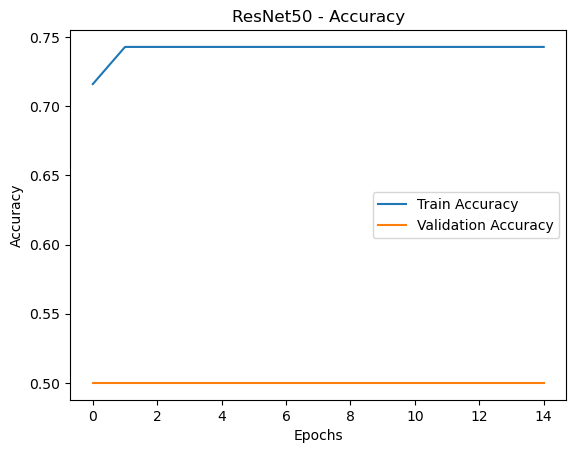

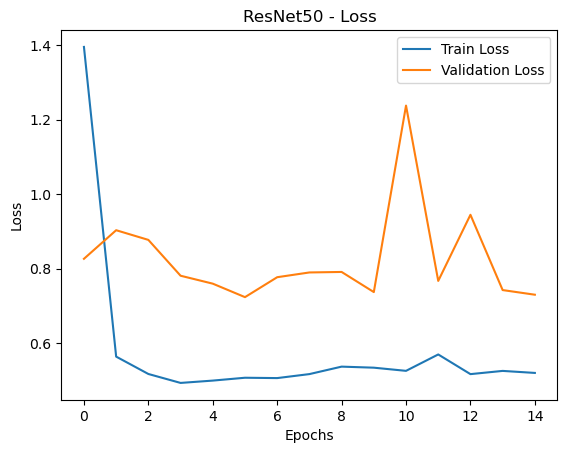

In [13]:
# Graficar resultados para ResNet50
plt.plot(history_resnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('ResNet50 - Accuracy')
plt.show()

plt.plot(history_resnet.history['loss'], label='Train Loss')
plt.plot(history_resnet.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('ResNet50 - Loss')
plt.show()

20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step


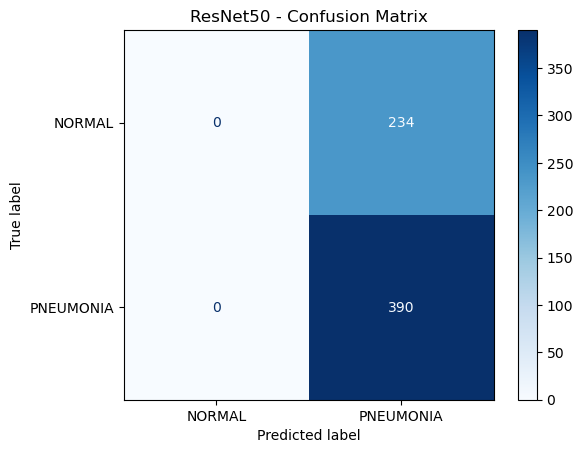

In [14]:
# Matriz de confusión para ResNet50
y_pred_resnet = model_resnet.predict(test_generator)
y_pred_binary_resnet = (y_pred_resnet > 0.5).astype(int)
cm_resnet = confusion_matrix(test_generator.classes, y_pred_binary_resnet)
disp_resnet = ConfusionMatrixDisplay(confusion_matrix=cm_resnet, display_labels=test_generator.class_indices.keys())
disp_resnet.plot(cmap='Blues', values_format='d')
plt.title('ResNet50 - Confusion Matrix')
plt.show()

In [8]:
#DESNET
from tensorflow.keras.applications import DenseNet121

# Cargar el modelo DenseNet121 preentrenado sin la capa superior
base_model_densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas del modelo base
for layer in base_model_densenet.layers:
    layer.trainable = False

# Añadir capas adicionales
x_densenet = Flatten()(base_model_densenet.output)
x_densenet = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x_densenet)
x_densenet = Dropout(0.5)(x_densenet)
x_densenet = Dense(1, activation='sigmoid')(x_densenet)

# Crear el modelo final
model_densenet = Model(inputs=base_model_densenet.input, outputs=x_densenet)

# Compilar el modelo
model_densenet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model_densenet.summary()

# Entrenar el modelo
history_densenet = model_densenet.fit(train_generator,
                                      validation_data=val_generator,
                                      epochs=10,
                                      verbose=1)

model_densenet.save('chest_xray_densenet.h5')

# Evaluar el modelo
loss_densenet, accuracy_densenet = model_densenet.evaluate(test_generator)
print(f'DenseNet121 - Loss: {loss_densenet:.4f}, Accuracy: {accuracy_densenet:.4f}')

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d                │ (None, 230, 230, 3)       │               0 │ input_layer_2[0][0]        │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,408 │ zero_padding2d[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_1              │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 56, 56, 64)        │               0 │ zero_padding2d_1[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, 56, 56, 64)        │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 128)       │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 128)       │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 128)       │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 32)        │          36,864 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_concat           │ (None, 56, 56, 96)        │               0 │ pool1[0][0],               │
│ (Concatenate)                 │                           │               

 Total params: 19,883,073 (75.85 MB)

 Trainable params: 12,845,569 (49.00 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 280s 2s/step - accuracy: 0.8094 - loss: 6.8922 - val_accuracy: 0.8750 - val_loss: 1.0591
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.8764 - loss: 0.8021 - val_accuracy: 0.6875 - val_loss: 0.8587
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 279s 2s/step - accuracy: 0.8832 - loss: 0.5018 - val_accuracy: 0.8125 - val_loss: 0.5520
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.8414 - loss: 0.4614 - val_accuracy: 0.8125 - val_loss: 0.4662
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.8660 - loss: 0.4122 - val_accuracy: 0.8750 - val_loss: 0.4984
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/step - accuracy: 0.8724 - loss: 0.3962 - val_accuracy: 0.8750 - val_loss: 0.5113
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.8673 - loss: 0.3756 - val_accuracy: 0.8750 - val_loss: 0.5125
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 270s 2s/step - accuracy: 0.8571 - loss: 0.3940 - val_accu

20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8877 - loss: 0.5490
DenseNet121 - Loss: 0.4153, Accuracy: 0.8846


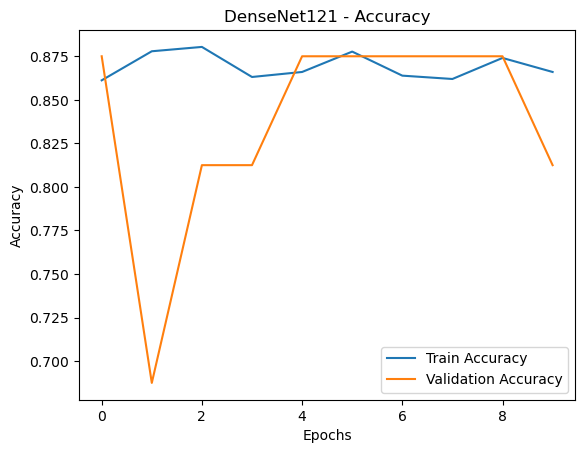

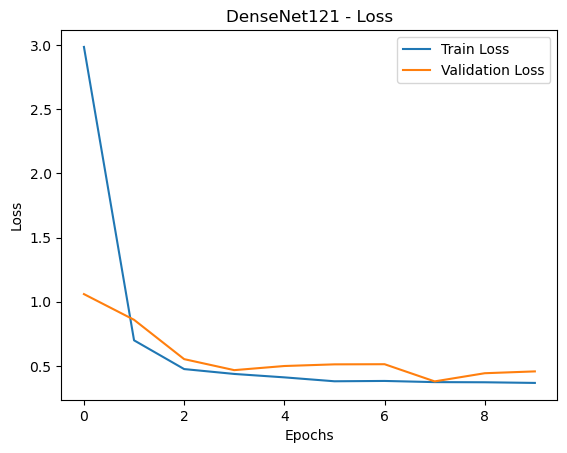

In [9]:
# Graficar resultados para DenseNet121
plt.plot(history_densenet.history['accuracy'], label='Train Accuracy')
plt.plot(history_densenet.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('DenseNet121 - Accuracy')
plt.show()

plt.plot(history_densenet.history['loss'], label='Train Loss')
plt.plot(history_densenet.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('DenseNet121 - Loss')
plt.show()

In [10]:
# Matriz de confusión para DenseNet121
y_pred_densenet = model_densenet.predict(test_generator)
y_pred_binary_densenet = (y_pred_densenet > 0.5).astype(int)
cm_densenet = confusion_matrix(test_generator.classes, y_pred_binary_densenet)
disp_densenet = ConfusionMatrixDisplay(confusion_matrix=cm_densenet, display_labels=test_generator.class_indices.keys())
disp_densenet.plot(cmap='Blues', values_format='d')
plt.title('DenseNet121 - Confusion Matrix')
plt.show()

20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step


In [17]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
model_vgg16 = load_model('chest_xray_vgg16.h5')
model_densenet = load_model('chest_xray_densenet.h5')

optimizer = Adam(learning_rate=0.001)
model_vgg16.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model_densenet.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
def preprocess_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

def predict_image(model, image_array):
    prediction = model.predict(image_array)
    return 'Pneumonia' if prediction[0][0] > 0.5 else 'Normal'

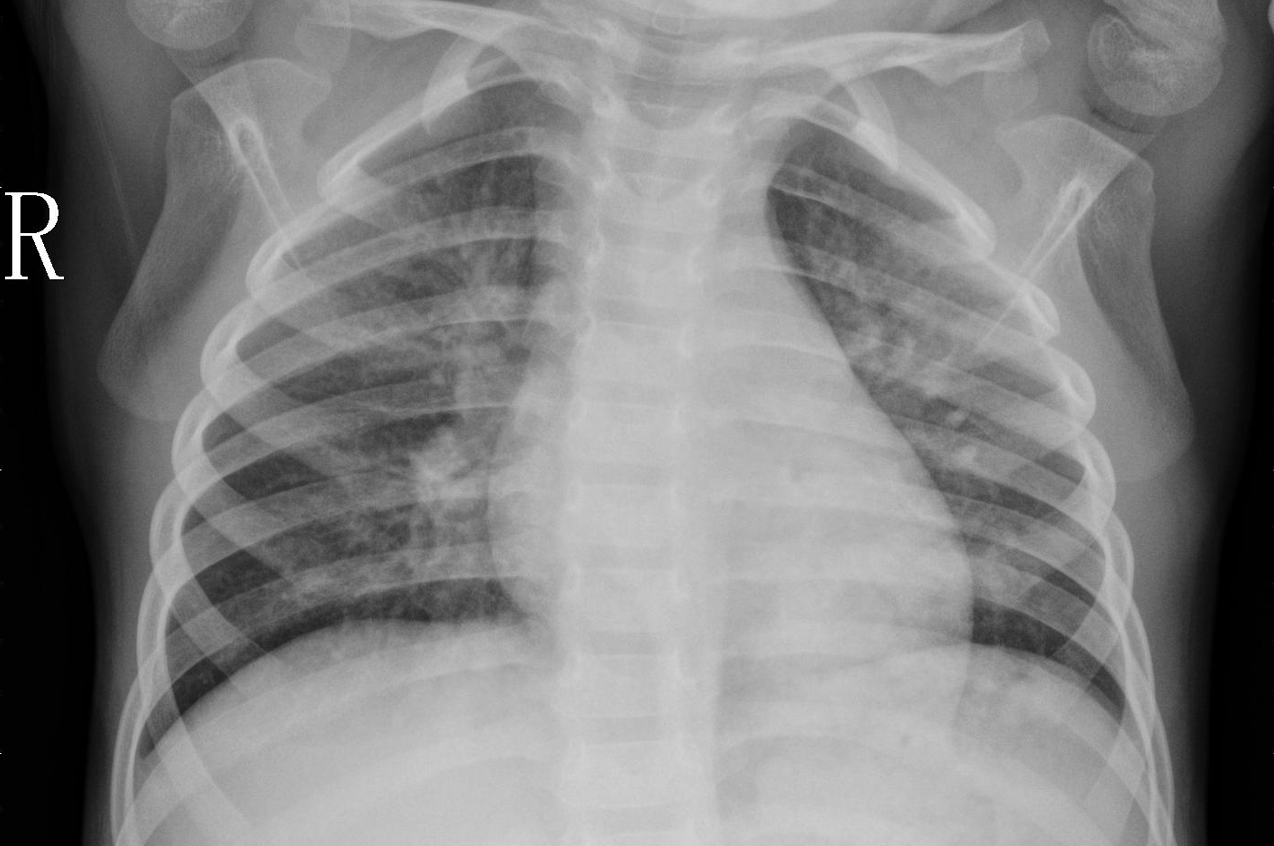

In [24]:
# Ruta de la imagen para predecir
image_path = "C:\\Users\\Diego\\Prueba1.jpeg"

# Preprocesar la imagen
img_array = preprocess_image(image_path, target_size=(224, 224))

# Realizar la predicción
prediction_vgg16 = predict_image(model_vgg16, img_array)
prediction_densenet = predict_image(model_densenet, img_array)

# Mostrar el resultado
print(f"Image: {os.path.basename(image_path)}")
print(f"VGG16 Prediction: {prediction_vgg16}")
print(f"Densenet Prediction: {prediction_densenet}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Image: Prueba1.jpeg
VGG16 Prediction: Pneumonia
Densenet Prediction: Normal


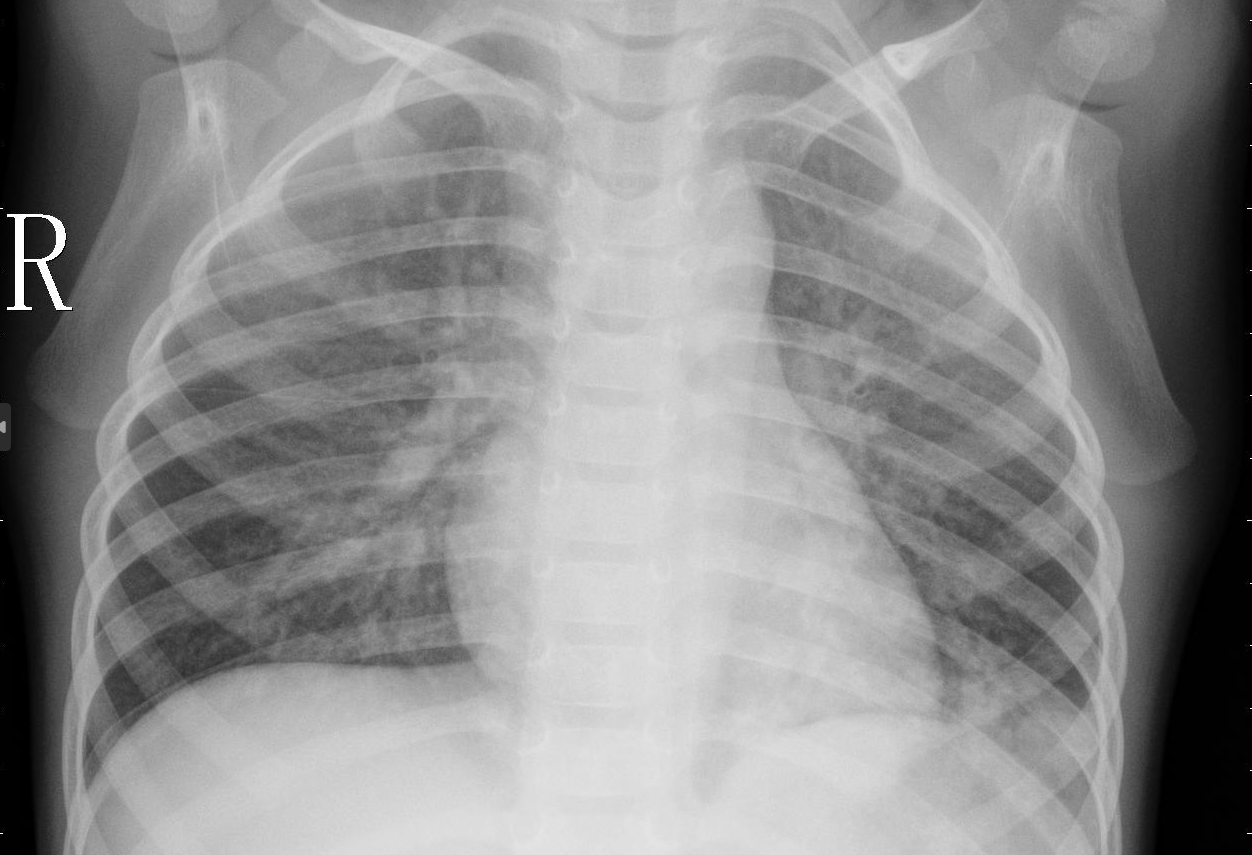

In [28]:
# Ruta de la imagen para predecir
image_path = "C:\\Users\\Diego\\Prueba2.jpeg"

# Preprocesar la imagen
img_array = preprocess_image(image_path, target_size=(224, 224))

# Realizar la predicción
prediction_vgg16 = predict_image(model_vgg16, img_array)
prediction_densenet = predict_image(model_densenet, img_array)

# Mostrar el resultado
print(f"Image: {os.path.basename(image_path)}")
print(f"VGG16 Prediction: {prediction_vgg16}")
print(f"Densenet Prediction: {prediction_densenet}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Image: Prueba2.jpeg
VGG16 Prediction: Pneumonia
Densenet Prediction: Pneumonia


In [27]:
# Ruta de la imagen para predecir
image_path = "C:\\Users\\Diego\\Prueba3.jpeg"

# Preprocesar la imagen
img_array = preprocess_image(image_path, target_size=(224, 224))

# Realizar la predicción
prediction_vgg16 = predict_image(model_vgg16, img_array)
prediction_densenet = predict_image(model_densenet, img_array)

# Mostrar el resultado
print(f"Image: {os.path.basename(image_path)}")
print(f"VGG16 Prediction: {prediction_vgg16}")
print(f"Densenet Prediction: {prediction_densenet}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Image: Prueba3.jpeg
VGG16 Prediction: Normal
Densenet Prediction: Normal
